In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
8**2
8*8

64

### Covariance

We've talked about variance (the average square deviation from the mean). Covariance is, as you've guessed, similar. Let's say we have a data vector, $x^a$, which has $i$ points... so $x_i^a$ is the first element of the data vector, from the previous section we'd have that:

$$ Var^{a,a} = \frac{1}{N-1} \sum_{i=1}^N (x_i^a - \mu^a)(x_i^a - \mu^a), $$

This should look like the last section, except I've stuck $a$ in a few places. Another way of stating this is that this is covariance of vector $x^a$ with itself. Notice there are two sets of brackets, both use data vector $x^a$. Covariance is what you get when you change one of the letters. Like this:

$$ Var^{a,b} = \frac{1}{N-1} \sum_{i=1}^N (x_i^a - \mu^a)(x_i^b - \mu^b), $$

Easy! All we've done is now one set in the brackets iterates over a different data vector. The goal is to do this for each different vector you have to form a matrix. If we had only two vectors, our matrix is this:

$$ Cov = \begin{pmatrix} Var^{a,a} & Var^{a,b} \\ Var^{b,a} & Var^{b,b} \\ \end{pmatrix} $$

Notice how this is symmetric. $Var^{a,b} = Var^{b,a}$. And the diagonals are just the variance for each data vector. The off-diagonals are measure of the joint spread between the two. If the concept still isn't perfect, don't worry, the examples will clear everything up.

We can calculate the covariance using either `np.cov` ([doco here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)) or `pd.DataFrame.cov` ([doco here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html)).

In [10]:
dataset = pd.read_csv("height_weight.csv")[["height", "weight"]]
dataset.head()

,height,weight
0,71.74,259.88
1,71.00,186.73
2,63.83,172.17
3,67.74,174.66
4,67.28,169.20


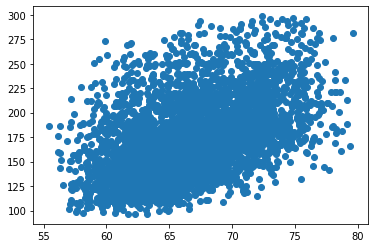

In [14]:
plt.scatter(dataset['height'], dataset['weight']);

In [14]:
covariance = np.cov(dataset, rowva=False)
print(covariance)

[[  18.60200779   78.50218098]
 [  78.50218098 1512.91208783]]


In [17]:
covariance = dataset.cov()
print(covariance)

           height       weight
height  18.602008    78.502181
weight  78.502181  1512.912088


### Correlation

Correlation and covariance are easily linked. If we take that 2D covariance matrix from above, which is written in terms of variance, we can rewrite it in terms of standard deviation $\sigma$, as $Var = \sigma^2$.

$$ Cov = \begin{pmatrix} \sigma^2_{a,a} & \sigma^2_{a,b} \\ \sigma^2_{b,a} & \sigma^2_{b,b} \\ \end{pmatrix} $$

Great. And here is the correlation matrix:

$$ Corr = \begin{pmatrix} \sigma^2_{a,a}/\sigma^2_{a,a} & \sigma^2_{a,b}/(\sigma_{a,a}\sigma_{b,b}) \\ \sigma^2_{b,a}/(\sigma_{a,a}\sigma_{b,b}) & \sigma^2_{b,b}/\sigma^2_{b,b} \\ \end{pmatrix} $$

Which is the same as

$$ Corr = \begin{pmatrix} 1 & \rho_{a,b} \\ \rho_{b,a} & 1 \\ \end{pmatrix}, $$

where $\rho_{a,b} = \sigma^2_{a,b}/(\sigma_{a,a}\sigma_{b,b})$. Another way to think about this is that 

$$ Corr_{a,b} = \frac{Cov_{a,b}}{\sigma_a \sigma_b} $$

It is the joint variability normalised by the variability of each independent variable.

But this is *still too mathy for me*. Let's just go back to the code. We can calculate a correlation matrix using `np.corrcoef` ([doco here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)) or `pd.DataFrame.corr` ([doco here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html))

In [20]:
corr = np.corrcoef(dataset.T)
print(corr)

[[1.         0.46794517]
 [0.46794517 1.        ]]


In [21]:
corr = dataset.corr()
corr

,height,weight
height,1.000000,0.467945
weight,0.467945,1.000000


So, what does this mean? In as simple as I can put it, the fact we have a positive number for the height-weight correlation means that, *on average*, a taller person probably weights more (than a shorter person). A shorter person, *on average* probably weighs less than a tall person.

If the number was negative, it would mean the opposite - a tall person would normally weigh less than a short person. One is as far as you can get, and if our $0.468$ was $1$, it would mean that a tall person would *always* weight more than a short person. The bigger the number (in absolute terms), the more likely you are to find that correlation.

Here are some other examples:

* **Age vs number of pregnancies**: Positive correlation
* **Temperature in Celcius vs Temperature in Kelvin**: Total positive correlation ($1.0$)
* **Amount of cigarettes smoked vs Life expectance**: Negative correlation
* **Height vs Comfort on plane seats**: Negative correlation
* **Number of units purchased vs Cost of individual unit**: Hopefully a negative correlation!

Take two things and ask yourself, if one goes up, do I expect the other to go, down or not change? 

That is correlation. And now you can quantify it.

And, given we did this in the EDA section, you can also make plots of it and explore it visually.

# Points to take home

>  standard normal distribution means: (μ = 0 and σ = 1)